# Project

Project Title: When is College Worth it: An In-depth Data Analysis of Post University Wages. 

Group members: \
Zhenzhao Tu (UID u1315097)\
Fernando Turcios (UID U0935172) \
Lincoln Sand (UID u1358804)


Emails: tuzhenzhao@gmail.com, Fernandoturcios222@gmail.com and sandlincoln@gmail.com

## Project description


The main objective of the project is to determine the most optimal way to go to college. The data provided is from 1.2 million people with only a bachelor's degree. There are three major sections to the website, Salary Increase by Major, Salaries By Region, and Salary Increase By Type of College. We want to look at these three variables (Major, Region, and College Type) and see if they play a major role in predicting a students post university wage. The data provided breaks down the distirubiton of salaries for various majors, schools, and regions into various variables. The next step is to do some exploratory analysis to understand our data and determine our essential variables. For the exploratory analysis methods, we plan on using some basic descriptive statistics for each variable on its own (mean, median, stdev...) and also plotting (to determine the overall distribution of the sampled variable). Next, we can test the relationship between variables (multiple variables also) with linear regression and scatter plots. We will need to figure out a way to determine how to handle the categorical variables (group undecided on how to proceed). After that, we wish to apply some more intensive analysis methods learned in class (which will be determined after the exploratory analysis).

## Data Description

The data we will be using is provided by The Wall Street Journal on their website: http://online.wsj.com/public/resources/documents/info-Degrees_that_Pay_you_Back-sort.html.
The data is from a year-long survey of 1.2 million people with only bachelor's degrees. The survey breaks the data down into 3 major sections. The first section is Salaries for colleges by type. This section consists of a 269 rows (different schools) and 7 variables (1 school type and 6 salary variables). The next section Salaries for colleges by region is similar to the previous section with 320 rows and 7 variables (1 region variable and 6 salary variables). The third section is Degrees that pay you back, it contains 50 rows for different majors and 7 variables (6 about salary and 1 about growth). These three sections are the csv files attached. They were required to be scraped from the website by downloading the html site and we were able to scrape it from the saved data. The Wall street journal had not little to no info on their rules for scraping. The scrapping was tedious with the first page, but once it was all sorted out, the overall code was able to be copied and pasted for the other two sections with minor changes. The code overall is pretty much clean but there are a few missing values for each of the columns on some of the sections (primarily 2 of the sections the 3rd section has no missing values). For these missing values (quite a few for one of the variables) we wish to apply a bootstrapping method to fill in the missing values instead of leaving them out or replacing those values with 0.



## Ethical Data Concerns (EDA) 

There are a few things to consider about the data we are using. The biggest concern is that there is little detail on how the data was collected. We are relying on the reputation of The New York Times. We dont know if the data was collected using appropriate methods (Simple Random Sample, the wording of survey....). Without any details on how the survey was conducted we can not be sure that our data came from a proccess of good scientific standadrd. Another concern is how we handle our categorical data. For example the section that contains the college type can contain 1 of 5 diffrent opetions (Califonia, Western, Midestern, Southern, Northeastern). To try and analize this we might convert those options into a number system to do proper anaylsis. When finalizing our results, we must be aware that they rely on the strength of the survey conducted and the reputation of The New York Times and trust that the overall process was done with high scientific standards. 

## Package Import

In [46]:
# imports and setup 

import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

## Data Exploration

First we import the datasets we will use:

In [39]:
major = pd.read_csv("Project_Major_dataset.csv")
major.rename(columns = {'Unnamed: 0':'Major'}, inplace = True)
major.head()

,Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [4]:
#Fernando code 
df_Major = major
print(df_Major.describe())


       Starting Median Salary  Mid-Career Median Salary  \
count               50.000000                  50.00000   
mean             44310.000000               74786.00000   
std               9360.866217               16088.40386   
min              34000.000000               52000.00000   
25%              37050.000000               60825.00000   
50%              40850.000000               72000.00000   
75%              49875.000000               88750.00000   
max              74300.000000              107000.00000   

       Percent change from Starting to Mid-Career Salary  \
count                                          50.000000   
mean                                           69.274000   
std                                            17.909908   
min                                            23.400000   
25%                                            59.125000   
50%                                            67.800000   
75%                                            8

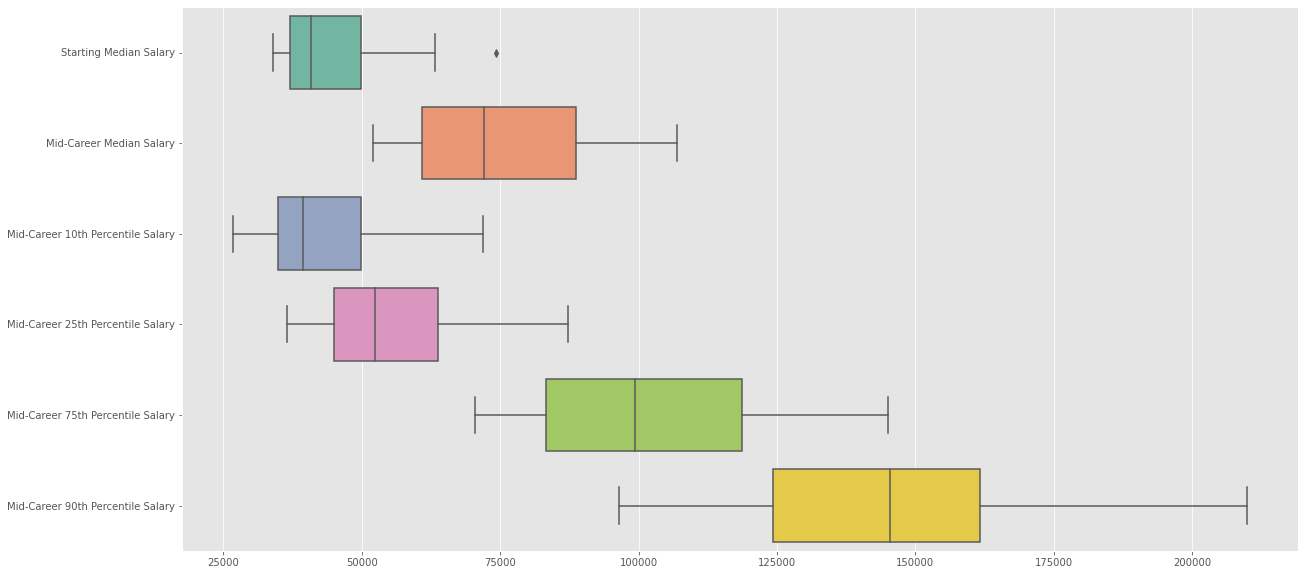

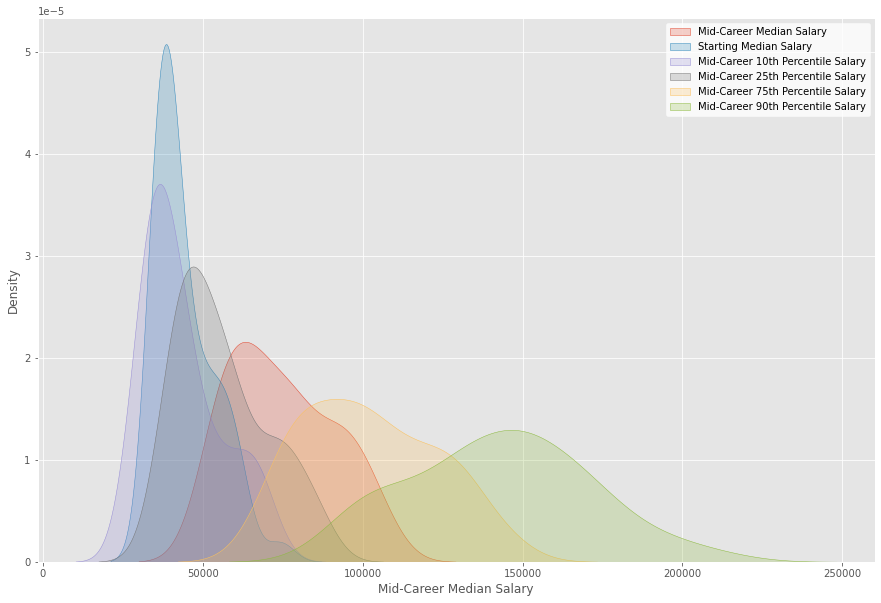

In [5]:
#Added by Fernando 

#Pox plot to understand the distribution of the variables
ax = sns.boxplot(data=df_Major[["Starting Median Salary","Mid-Career Median Salary","Mid-Career 10th Percentile Salary","Mid-Career 25th Percentile Salary","Mid-Career 75th Percentile Salary","Mid-Career 90th Percentile Salary"]], orient="h", palette="Set2")



f, ax1 = plt.subplots(figsize=(15, 10))


#ditribution plots 
sns.kdeplot(df_Major["Mid-Career Median Salary"], shade=True,label="Mid-Career Median Salary")
sns.kdeplot(df_Major["Starting Median Salary"], shade=True,label="Starting Median Salary")
sns.kdeplot(df_Major["Mid-Career 10th Percentile Salary"], shade=True,label="Mid-Career 10th Percentile Salary")
sns.kdeplot(df_Major["Mid-Career 25th Percentile Salary"], shade=True,label="Mid-Career 25th Percentile Salary")
sns.kdeplot(df_Major["Mid-Career 75th Percentile Salary"], shade=True,label="Mid-Career 75th Percentile Salary")
sns.kdeplot(df_Major["Mid-Career 90th Percentile Salary"], shade=True,label="Mid-Career 90th Percentile Salary")


legend = plt.legend()
frame = legend.get_frame()
frame.set_color('white')



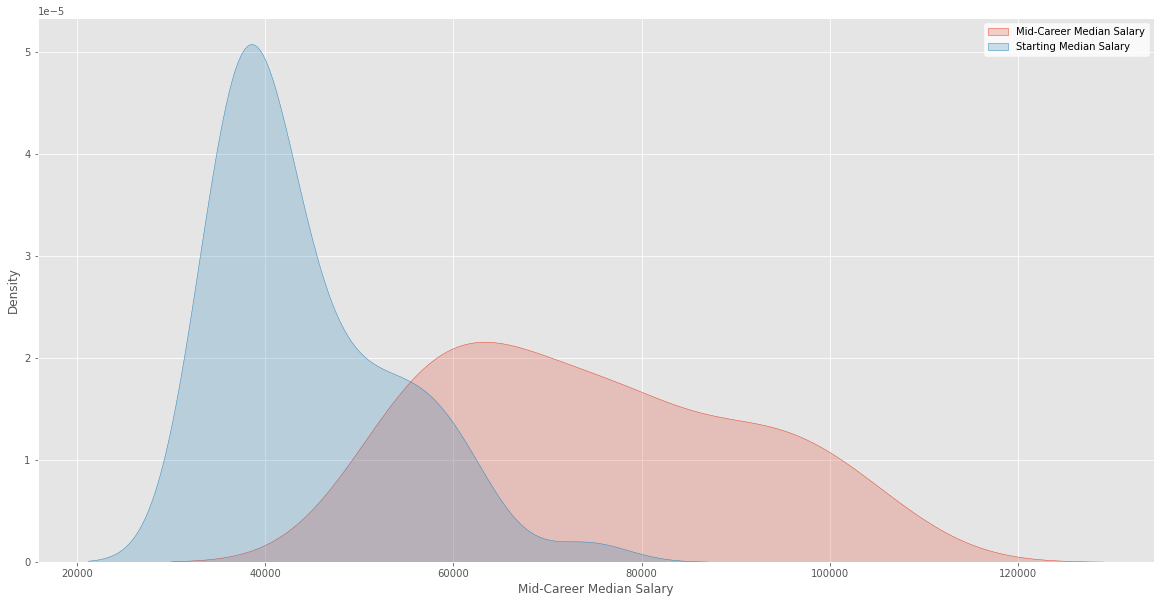

In [6]:
#added by Fernando 

sns.kdeplot(df_Major["Mid-Career Median Salary"], shade=True,label="Mid-Career Median Salary")
sns.kdeplot(df_Major["Starting Median Salary"], shade=True,label="Starting Median Salary")


legend = plt.legend()
frame = legend.get_frame()
frame.set_color('white')

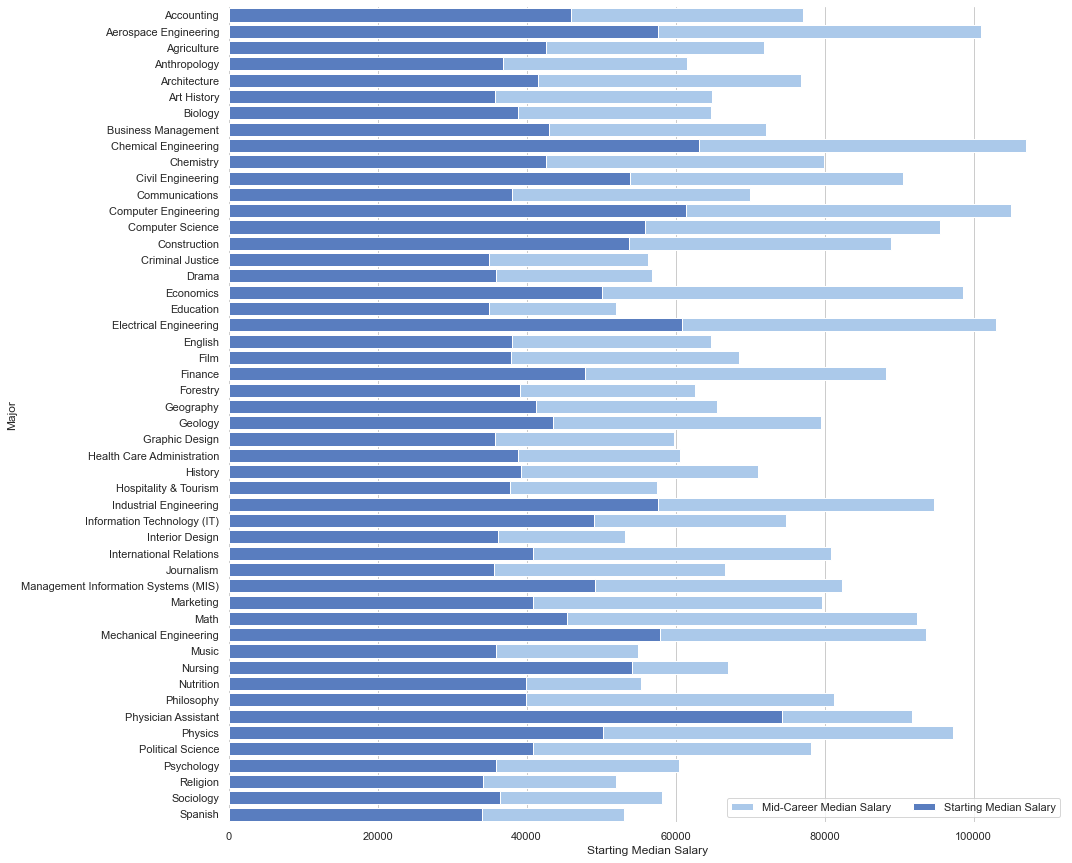

In [7]:
#Added by Fernando 

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax2 = plt.subplots(figsize=(15, 15))

sns.set_color_codes("pastel")
sns.barplot(y=df_Major["Major"], x="Mid-Career Median Salary", data=df_Major,label="Mid-Career Median Salary", color="b")

sns.set_color_codes("muted")
sns.barplot(y=df_Major["Major"], x="Starting Median Salary", data=df_Major,label="Starting Median Salary", color="b")

# Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)


<AxesSubplot:>

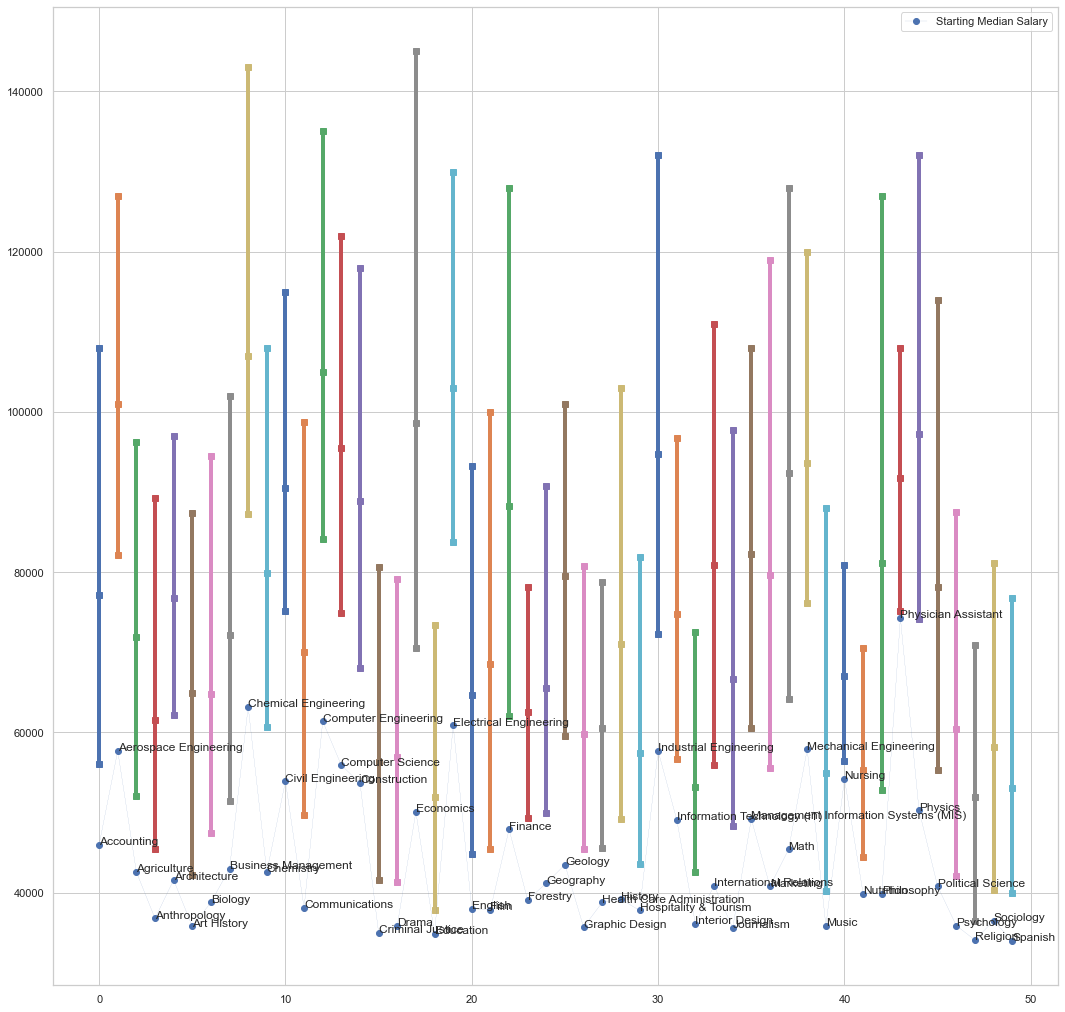

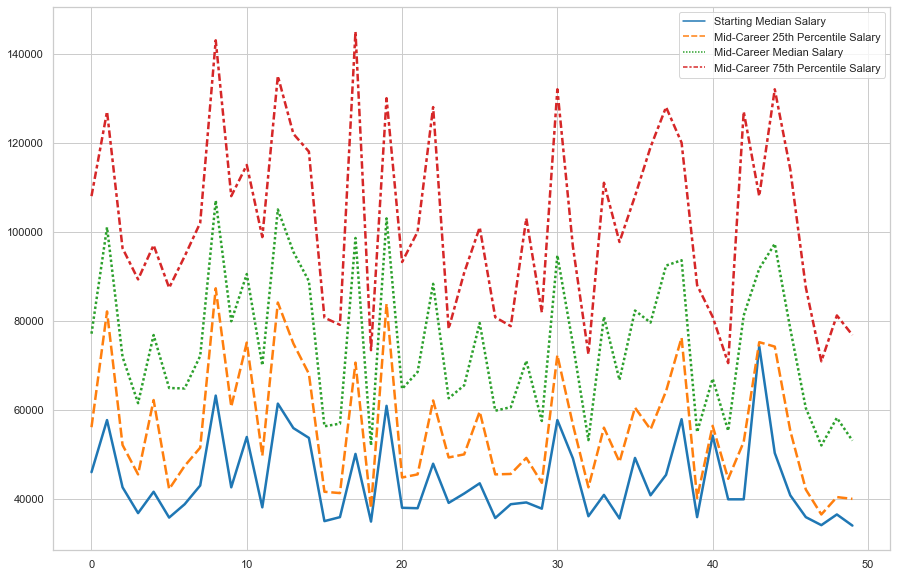

In [8]:
#Added by Fernando 

df_Major = major
x = range(0,50)
df_Major['id'] = x

f, ax1 = plt.subplots(figsize=(18, 18))

for i, val in enumerate(df_Major["Major"]):
    x = np.full((1,3),df_Major['id'][i])
    y = np.full((1,3),0)
    
    y[0][0] = df_Major["Mid-Career 25th Percentile Salary"][i]
    y[0][1] = df_Major["Mid-Career Median Salary"][i]
    y[0][2] = df_Major["Mid-Career 75th Percentile Salary"][i]
    
    plt.plot(x[0],y[0],marker='s',linewidth=4)
    
    
plt.plot(df_Major['id'],df_Major['Starting Median Salary'],marker='o',label='Starting Median Salary',linewidth=.1)    
ax1.legend()    
   
for i, val in enumerate(df_Major["Major"]):
    plt.annotate(val,xy=(df_Major['id'][i],df_Major['Starting Median Salary'][i])) 
    
    
# added by fernando 
f, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=df_Major[["Starting Median Salary","Mid-Career 25th Percentile Salary","Mid-Career Median Salary","Mid-Career 75th Percentile Salary"]], palette="tab10", linewidth=2.5)



In [9]:
#added by Fernando

In [10]:
# adding a difference between Starting Median Salary and Mid-Career Median Salary
difference =  major['Mid-Career Median Salary']-major['Starting Median Salary']
major["difference"] = difference
major.head()

,Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,id,difference
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0,0,31100.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0,1,43300.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0,2,29300.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0,3,24700.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0,4,35200.0


In [11]:
# sorting mid-career median salary
mid_sala = major.sort_values(by='Mid-Career Median Salary', ascending=False)
mid_sala.head()

,Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,id,difference
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0,8,43800.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0,12,43600.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0,19,42100.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0,1,43300.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0,17,48500.0


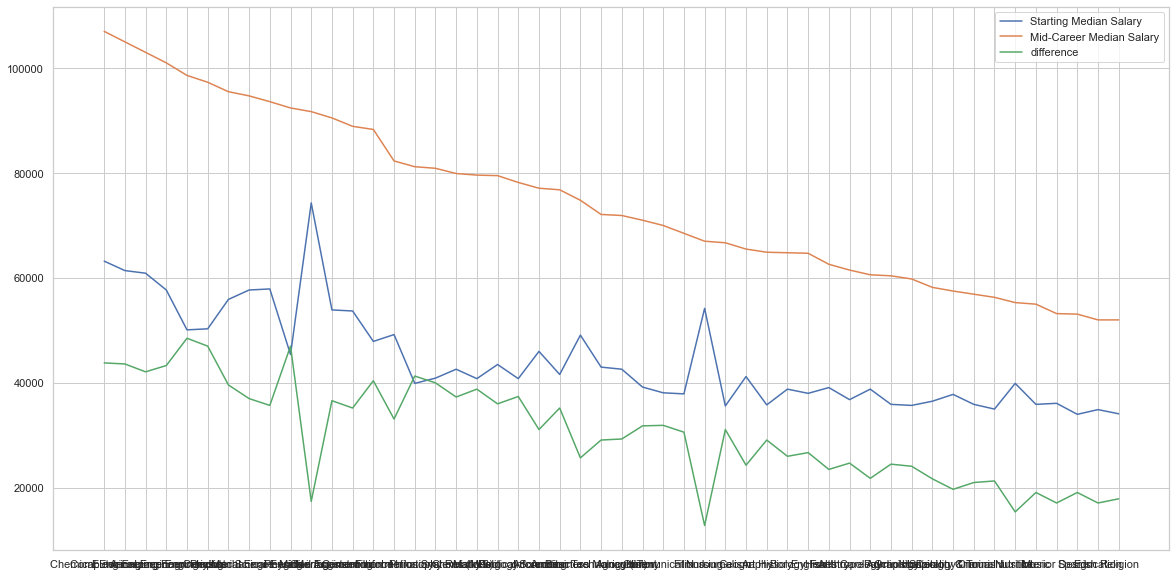

In [12]:
plt.plot(mid_sala["Major"], mid_sala['Starting Median Salary'], label = 'Starting Median Salary')
plt.plot(mid_sala["Major"], mid_sala['Mid-Career Median Salary'], label = 'Mid-Career Median Salary')
plt.plot(mid_sala["Major"], mid_sala['difference'], label = 'difference')
plt.legend()

In [13]:
# create a sorted difference
# adding a rank list

diff = major[['Major', 'Mid-Career Median Salary', 'difference']]
diff = diff.sort_values(by='Mid-Career Median Salary', ascending=False)
diff['rank'] = [51-x for x in range(1,51)]
diff = diff.sort_values(by='difference', ascending=False)
diff = diff.set_index('Major')
diff.head()

,Mid-Career Median Salary,difference,rank
Major,,,
Economics,98600.0,48500.0,46
Math,92400.0,47000.0,41
Physics,97300.0,47000.0,45
Chemical Engineering,107000.0,43800.0,50
Computer Engineering,105000.0,43600.0,49


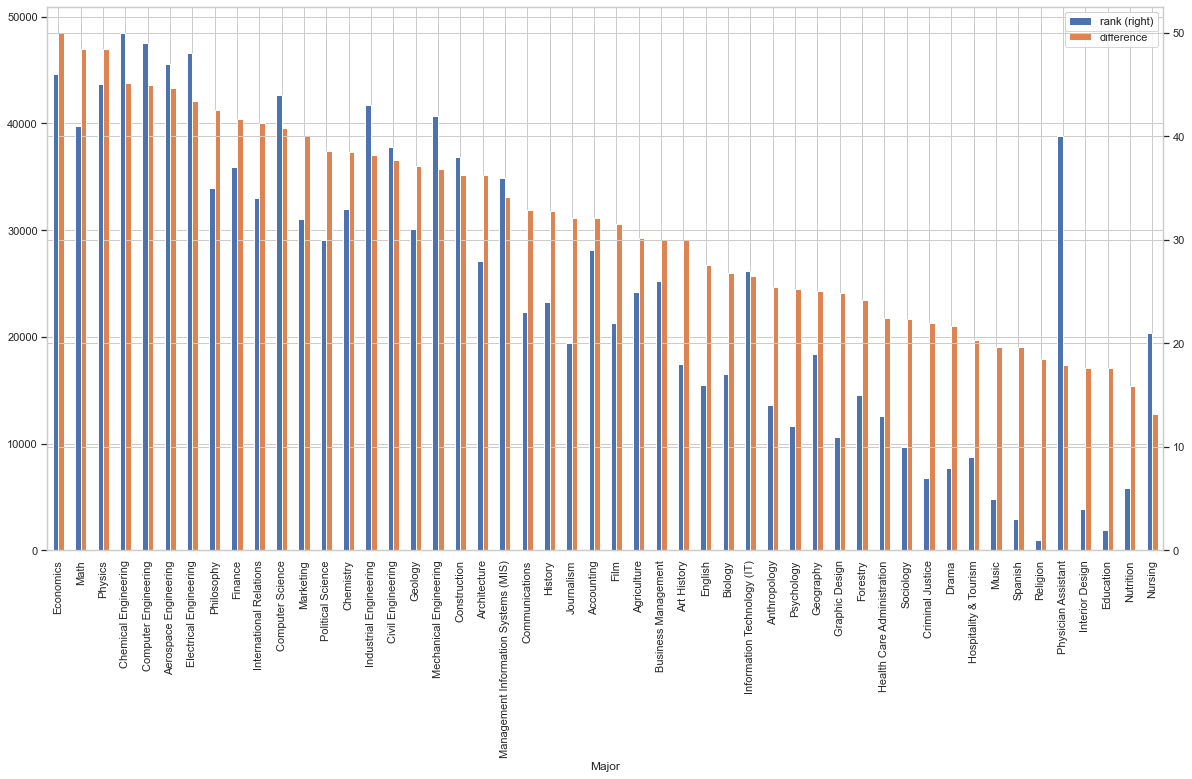

In [14]:
diff[['rank', 'difference']].plot(kind='bar', secondary_y = ["rank"], grid=True, label = 'rank')

# diff['difference'].plot(grid=True, label = 'difference')
# plt.plot(diff["Major"], diff['Mid-Career Median Salary'], label = 'Mid-Career Median Salary')
# plt.plot(diff["Major"], diff['difference'], label = 'difference')
plt.legend()

## Methodology

In [15]:
class_start = major[['Major', 'Starting Median Salary']]
sort = class_start.sort_values(by='Starting Median Salary', ascending=False)
sort['rank'] = [51-x for x in range(1,51)]
sort.head()

,Major,Starting Median Salary,rank
43,Physician Assistant,74300.0,50
8,Chemical Engineering,63200.0,49
12,Computer Engineering,61400.0,48
19,Electrical Engineering,60900.0,47
38,Mechanical Engineering,57900.0,46


In [16]:
list_group = np.array_split(sort, 5)
list_group[1]

,Major,Starting Median Salary,rank
14,Construction,53700.0,40
44,Physics,50300.0,39
17,Economics,50100.0,38
35,Management Information Systems (MIS),49200.0,37
31,Information Technology (IT),49100.0,36
22,Finance,47900.0,35
0,Accounting,46000.0,34
37,Math,45400.0,33
25,Geology,43500.0,32
7,Business Management,43000.0,31


In [17]:
group_1 = pd.DataFrame(list_group[0]).reset_index()
group_2 = pd.DataFrame(list_group[1]).reset_index()
group_3 = pd.DataFrame(list_group[2]).reset_index()
group_4 = pd.DataFrame(list_group[3]).reset_index()
group_5 = pd.DataFrame(list_group[4]).reset_index()

In [18]:
difference = major[['Major', 'difference']]
sort_diff = difference.sort_values(by='difference', ascending=False)
sort_diff['rank'] = [51-x for x in range(1,51)]
list_diff = np.array_split(sort_diff, 5)
list_diff[0]

,Major,difference,rank
17,Economics,48500.0,50
44,Physics,47000.0,49
37,Math,47000.0,48
8,Chemical Engineering,43800.0,47
12,Computer Engineering,43600.0,46
1,Aerospace Engineering,43300.0,45
19,Electrical Engineering,42100.0,44
42,Philosophy,41300.0,43
22,Finance,40400.0,42
33,International Relations,40000.0,41


In [19]:
list_group[0]

,Major,Starting Median Salary,rank
43,Physician Assistant,74300.0,50
8,Chemical Engineering,63200.0,49
12,Computer Engineering,61400.0,48
19,Electrical Engineering,60900.0,47
38,Mechanical Engineering,57900.0,46
1,Aerospace Engineering,57700.0,45
30,Industrial Engineering,57700.0,44
13,Computer Science,55900.0,43
40,Nursing,54200.0,42
10,Civil Engineering,53900.0,41


In [20]:
int_df = pd.merge(list_group[0], list_diff[0], how ='inner', on =['Major'])

In [21]:
selected = []

for i in range(5):
    int_df = pd.merge(list_group[i], list_diff[i], how ='inner', on =['Major'])
    selected.append(int_df)
    
selected

[                    Major  Starting Median Salary  rank_x  difference  rank_y
 0    Chemical Engineering                 63200.0      49     43800.0      47
 1    Computer Engineering                 61400.0      48     43600.0      46
 2  Electrical Engineering                 60900.0      47     42100.0      44
 3   Aerospace Engineering                 57700.0      45     43300.0      45,
           Major  Starting Median Salary  rank_x  difference  rank_y
 0  Construction                 53700.0      40     35200.0      32
 1       Geology                 43500.0      32     36000.0      34,
          Major  Starting Median Salary  rank_x  difference  rank_y
 0  Agriculture                 42600.0      30     29300.0      24
 1      History                 39200.0      21     31800.0      28,
                         Major  Starting Median Salary  rank_x  difference  \
 0                    Forestry                 39100.0      20     23500.0   
 1  Health Care Administration     

In [22]:
sort_diff.head()

,Major,difference,rank
17,Economics,48500.0,50
44,Physics,47000.0,49
37,Math,47000.0,48
8,Chemical Engineering,43800.0,47
12,Computer Engineering,43600.0,46


In [23]:
sort.head()

,Major,Starting Median Salary,rank
43,Physician Assistant,74300.0,50
8,Chemical Engineering,63200.0,49
12,Computer Engineering,61400.0,48
19,Electrical Engineering,60900.0,47
38,Mechanical Engineering,57900.0,46


In [24]:
alpha_diff = sort_diff.sort_values(by=['Major'], ascending=True)
alpha_diff.head()

,Major,difference,rank
0,Accounting,31100.0,26
1,Aerospace Engineering,43300.0,45
2,Agriculture,29300.0,24
3,Anthropology,24700.0,18
4,Architecture,35200.0,31


In [25]:
alpha_start = sort.sort_values(by=['Major'], ascending=True)
alpha_start.head()

,Major,Starting Median Salary,rank
0,Accounting,46000.0,34
1,Aerospace Engineering,57700.0,45
2,Agriculture,42600.0,30
3,Anthropology,36800.0,13
4,Architecture,41600.0,28


In [29]:
sum_rank = alpha_start['rank'] + alpha_diff['rank']
class_start['sum_rank'] = sum_rank
df_sum_rank = class_start.sort_values(by=['sum_rank'], ascending=False)

df_sum_rank.head()

/var/folders/38/3vfcth493232cphvml_jy4k80000gn/T/ipykernel_18289/3908499153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_start['sum_rank'] = sum_rank


,Major,Starting Median Salary,sum_rank
8,Chemical Engineering,63200.0,96
12,Computer Engineering,61400.0,94
19,Electrical Engineering,60900.0,91
1,Aerospace Engineering,57700.0,90
44,Physics,50300.0,88


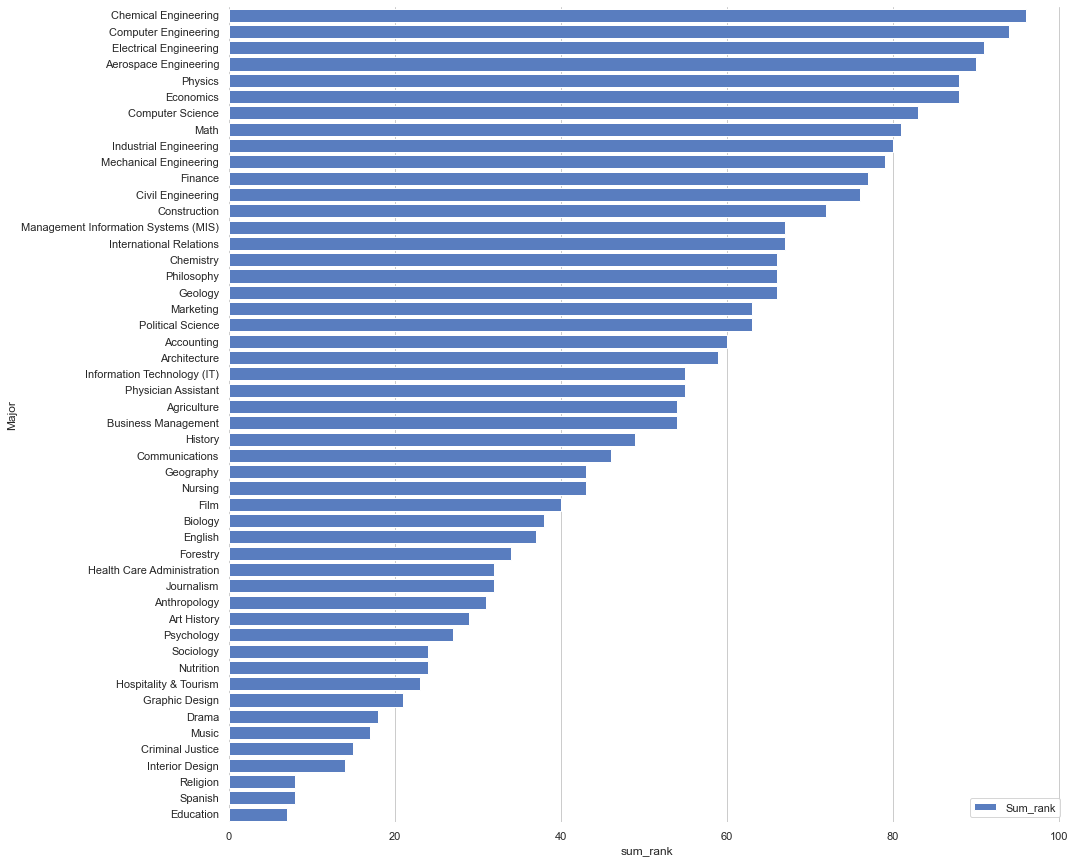

In [30]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax2 = plt.subplots(figsize=(15, 15))

sns.set_color_codes("muted")
sns.barplot(y=df_sum_rank["Major"], x="sum_rank", data=df_sum_rank,label="Sum_rank", color="b")

# Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

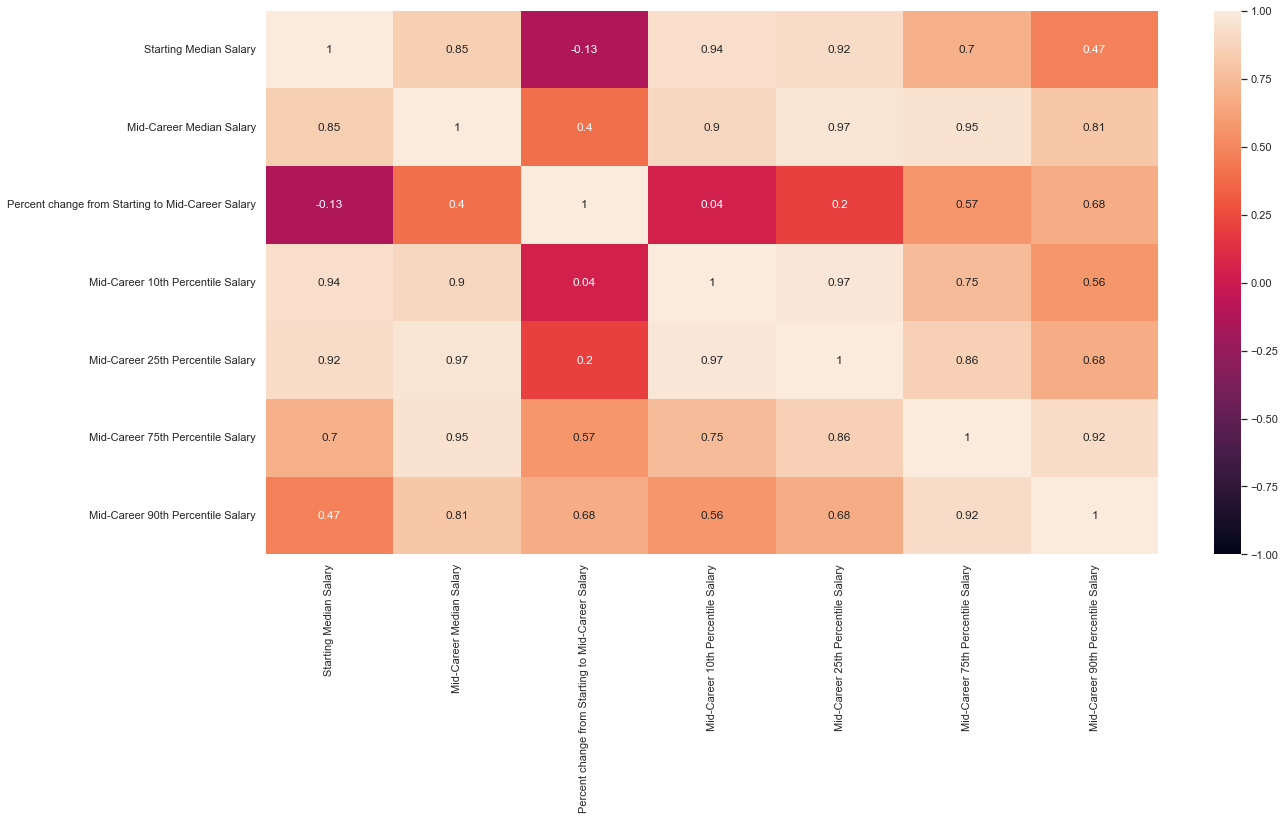

In [43]:
#heat map

# major = major.set_index('Major')
# major = major.drop(columns=['id'])
corr_major = major.corr()
heatmap = sns.heatmap(corr_major, vmin=-1, vmax=1, annot=True)

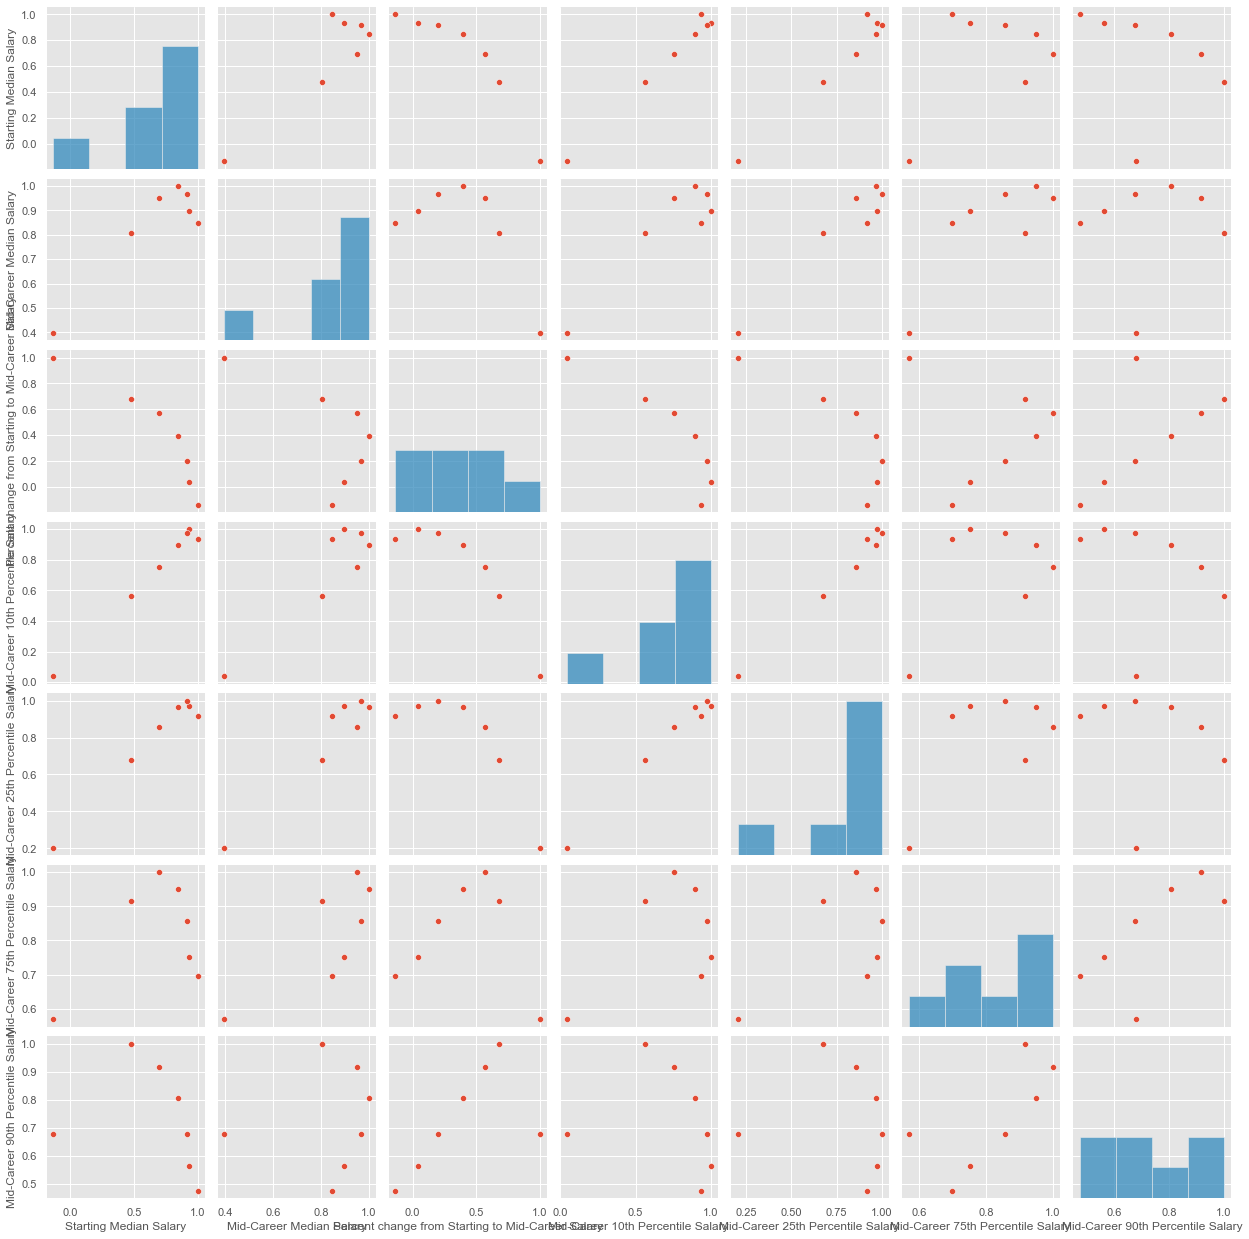

In [45]:
sns.pairplot(data=corr_major)

In [92]:
# linear regression
lr_major = mid_sala[['Major','difference', 'Mid-Career Median Salary', 'Starting Median Salary']]
lr_major.head()

,Major,difference,Mid-Career Median Salary,Starting Median Salary
8,Chemical Engineering,43800.0,107000.0,63200.0
12,Computer Engineering,43600.0,105000.0,61400.0
19,Electrical Engineering,42100.0,103000.0,60900.0
1,Aerospace Engineering,43300.0,101000.0,57700.0
17,Economics,48500.0,98600.0,50100.0


In [93]:
lr_start = lr_major.sort_values(by=['Starting Median Salary'], ascending=True)
lr_start.head()

,Major,difference,Mid-Career Median Salary,Starting Median Salary
49,Spanish,19100.0,53100.0,34000.0
47,Religion,17900.0,52000.0,34100.0
18,Education,17100.0,52000.0,34900.0
15,Criminal Justice,21300.0,56300.0,35000.0
34,Journalism,31100.0,66700.0,35600.0


In [94]:
lr_start = lr_start.rename(columns={"Mid-Career Median Salary": "Mid-Career", "Starting Median Salary": "Starting"}, errors="raise")
lr_start

,Major,difference,Mid-Career,Starting
49,Spanish,19100.0,53100.0,34000.0
47,Religion,17900.0,52000.0,34100.0
18,Education,17100.0,52000.0,34900.0
15,Criminal Justice,21300.0,56300.0,35000.0
34,Journalism,31100.0,66700.0,35600.0
26,Graphic Design,24100.0,59800.0,35700.0
5,Art History,29100.0,64900.0,35800.0
39,Music,19100.0,55000.0,35900.0
16,Drama,21000.0,56900.0,35900.0
46,Psychology,24500.0,60400.0,35900.0


                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     12.18
Date:                Wed, 20 Apr 2022   Prob (F-statistic):            0.00105
Time:                        21:04:02   Log-Likelihood:                -522.92
No. Observations:                  50   AIC:                             1050.
Df Residuals:                      48   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.017e+04   5943.616      1.711      0.0

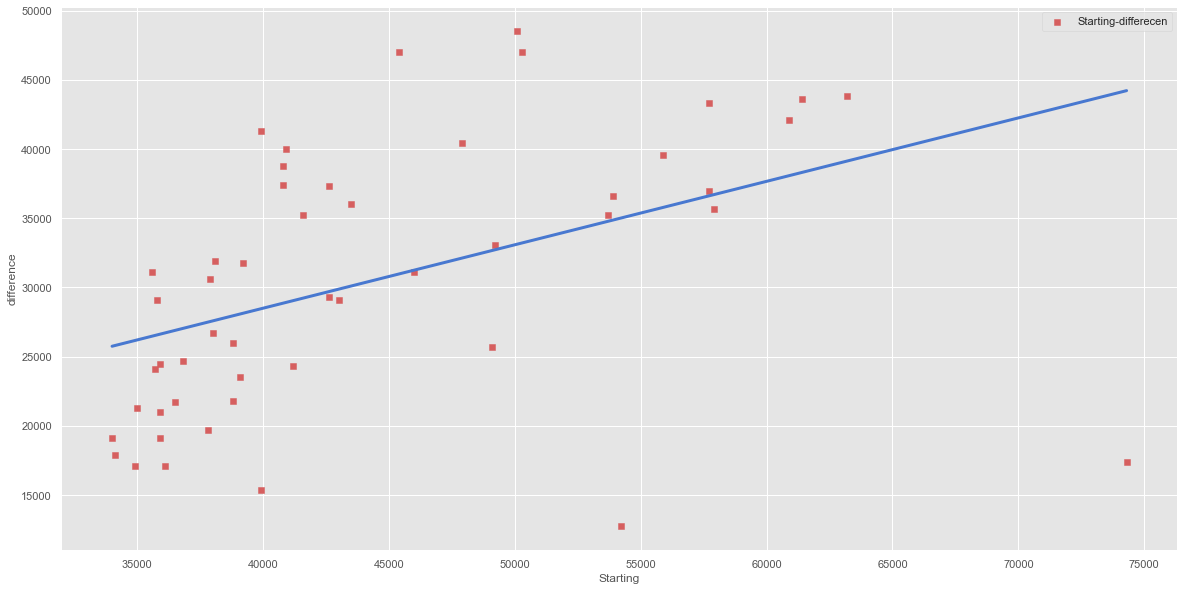

In [98]:
diff_start_ols = sm.ols(formula="difference ~ Starting", data=lr_start).fit()
print(diff_start_ols.summary())

plt.scatter(x=lr_start['Starting'],y=lr_start['difference'],c='r',marker='s',label='Starting-differecen')
plt.plot(lr_start['Starting'],diff_start_ols.predict(),c='b',linewidth=3)
plt.xlabel('Starting') 
plt.ylabel('difference')
plt.legend()